In [51]:
#Downloading dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d nelgiriyewithana/world-stock-prices-daily-updating

world-stock-prices-daily-updating.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
#Unzipping the dataset file
import zipfile
zip_ref = zipfile.ZipFile('/content/world-stock-prices-daily-updating.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [53]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [54]:
df = pd.read_csv('/content/World-Stock-Prices-Dataset.csv')

In [55]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2023-09-20 00:00:00-04:00,4.840000,4.910000,4.630000,4.670000,7441900.0,0.0,0.0,peloton,PTON,fitness,usa
1,2023-09-20 00:00:00-04:00,397.049988,397.989990,386.119995,386.299988,3866600.0,0.0,0.0,netflix,NFLX,entertainment,usa
2,2023-09-20 00:00:00-04:00,564.349976,569.219971,562.659973,563.830017,1311500.0,0.0,0.0,costco,COST,retail,usa
3,2023-09-20 00:00:00-04:00,138.550003,139.369995,135.199997,135.289993,46263700.0,0.0,0.0,amazon,AMZN,e-commerce,usa
4,2023-09-20 00:00:00-04:00,179.259995,179.699997,175.399994,175.490005,58436200.0,0.0,0.0,apple,AAPL,technology,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
279748,2023-08-29 00:00:00-04:00,18.719999,18.770000,18.020000,18.320000,5949600.0,0.0,0.0,foot locker,FL,footwear,usa
279749,2023-08-30 00:00:00-04:00,18.180000,18.650000,17.879999,18.549999,5829500.0,0.0,0.0,foot locker,FL,footwear,usa
279750,2023-08-31 00:00:00-04:00,18.620001,19.850000,18.469999,19.620001,6316100.0,0.0,0.0,foot locker,FL,footwear,usa
279751,2023-09-01 00:00:00-04:00,19.660000,20.139999,19.400000,19.870001,3982400.0,0.0,0.0,foot locker,FL,footwear,usa


In [56]:
df.info

<bound method DataFrame.info of                              Date        Open        High         Low  \
0       2023-09-20 00:00:00-04:00    4.840000    4.910000    4.630000   
1       2023-09-20 00:00:00-04:00  397.049988  397.989990  386.119995   
2       2023-09-20 00:00:00-04:00  564.349976  569.219971  562.659973   
3       2023-09-20 00:00:00-04:00  138.550003  139.369995  135.199997   
4       2023-09-20 00:00:00-04:00  179.259995  179.699997  175.399994   
...                           ...         ...         ...         ...   
279748  2023-08-29 00:00:00-04:00   18.719999   18.770000   18.020000   
279749  2023-08-30 00:00:00-04:00   18.180000   18.650000   17.879999   
279750  2023-08-31 00:00:00-04:00   18.620001   19.850000   18.469999   
279751  2023-09-01 00:00:00-04:00   19.660000   20.139999   19.400000   
279752  2023-09-05 00:00:00-04:00   19.730000   19.930000   18.820000   

             Close      Volume  Dividends  Stock Splits   Brand_Name Ticker  \
0         4.

In [57]:
#analyzing datatypes of columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

7

In [58]:
#missing values
missing_percentages = df.isna().sum().sort_values(ascending=False)
missing_percentages

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
dtype: int64

In [59]:
df['Country'].unique()

array(['usa', 'japan', 'germany', 'switzerland', 'canada', 'netherlands',
       'france'], dtype=object)

In [60]:
df['Ticker'].unique()

array(['PTON', 'NFLX', 'COST', 'AMZN', 'AAPL', 'NKE', 'TGT', 'GOOGL',
       'SPOT', 'ZM', 'DIS', 'RBLX', 'NTDOY', 'DAL', 'MSFT', 'LUV', 'AEO',
       'TSLA', 'SBUX', 'NVDA', 'CRM', 'HMC', 'CL', 'HSY', 'POAHY', 'CMG',
       'BAMXF', 'PINS', 'LOGI', 'SHOP', 'CROX', 'AMD', 'KO', 'ADDYY',
       'AXP', 'PMMAF', 'V', 'ADBE', 'SQ', 'UL', 'CSCO', 'JPM', 'LVMUY',
       'ABNB', 'MAR', 'UBSFY', 'ZI', 'TM', 'HLT', 'MCD', 'HD', 'MA',
       'JNJ', 'UBER', 'PG', 'COIN', 'FDX', 'MMM', 'JWN', 'PHG', 'FL'],
      dtype=object)

In [61]:
df['Industry_Tag'].unique()

array(['fitness', 'entertainment', 'retail', 'e-commerce', 'technology',
       'apparel', 'music', 'gaming', 'aviation', 'automotive',
       'food & beverage', 'consumer goods', 'food', 'social media',
       'footwear', 'finance', 'financial services', 'luxury goods',
       'hospitality', 'healthcare', 'cryptocurrency', 'logistics',
       'manufacturing'], dtype=object)

In [62]:
df['Country'].unique()

array(['usa', 'japan', 'germany', 'switzerland', 'canada', 'netherlands',
       'france'], dtype=object)

In [63]:
#Dropping the date column
columns_to_drop = ['Date']
df=df.drop(columns=columns_to_drop)

In [64]:
X = df.drop('Close', axis=1)
y = df['Close']

In [65]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X['Brand_Name'] = label_encoder.fit_transform(X['Brand_Name'])
X['Ticker'] = label_encoder.fit_transform(X['Ticker'])
X['Industry_Tag'] = label_encoder.fit_transform(X['Industry_Tag'])
X['Country'] = label_encoder.fit_transform(X['Country'])

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=99)

# Prediction Using Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [69]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.3363661521565404
MSE: 0.9126512494929209
RMSE: 0.955327823049722


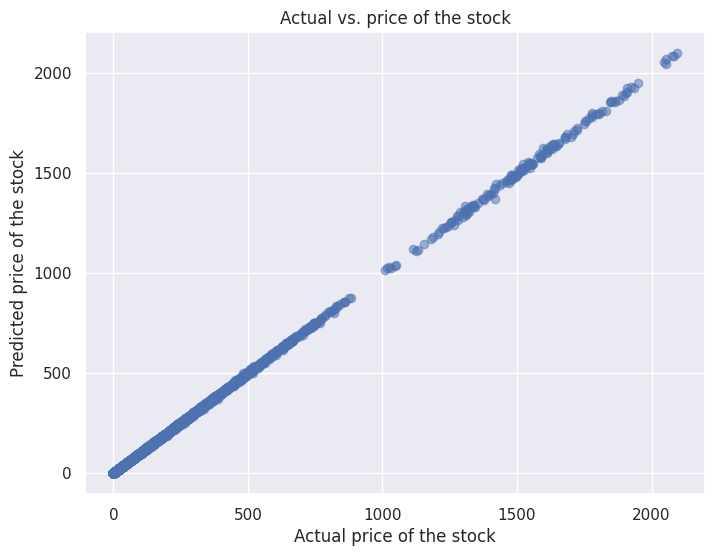

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Decision Tree Algorithm

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [72]:
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

In [73]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [74]:
y_pred = decision_tree.predict(X_test)

In [75]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 2.1917552757643204
Root Mean Squared Error: 1.4804577926318334


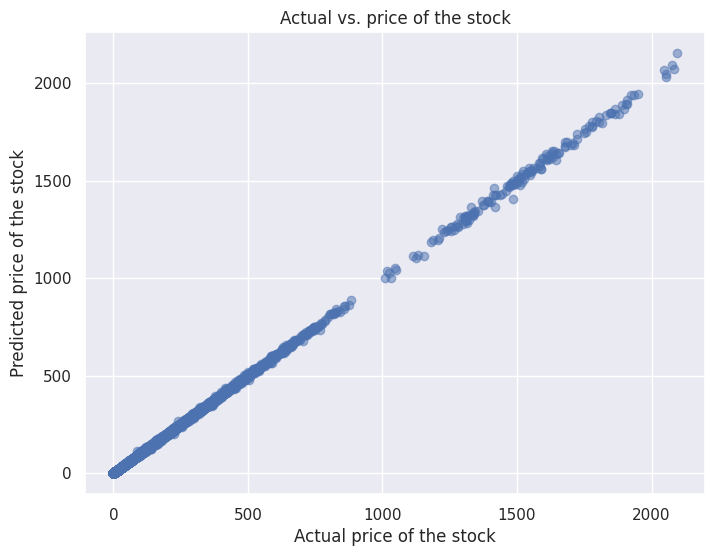

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction using k-nearest neighbors (KNN) regression

In [77]:
from sklearn.neighbors import KNeighborsRegressor

In [78]:
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [79]:
y_pred = knn.predict(X_test)

In [80]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 4087.4740004830387
Root Mean Squared Error: 63.93335593008581


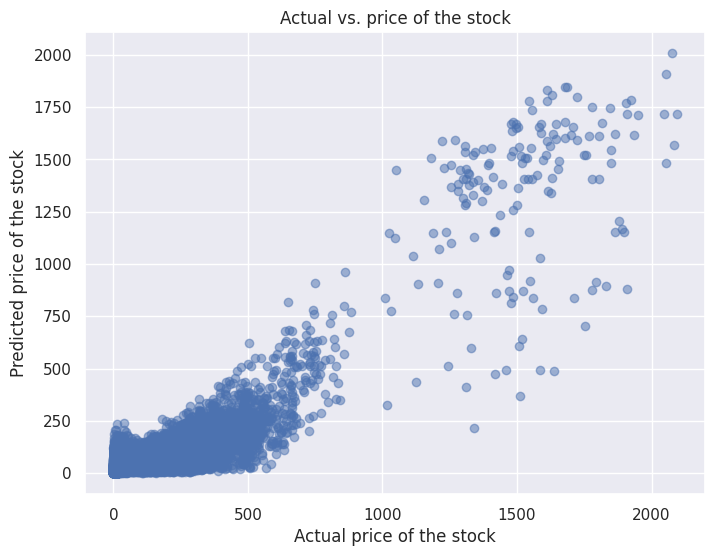

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Ridge Regression

In [82]:
from sklearn.linear_model import Ridge

In [83]:
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.29013e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [84]:
y_pred = ridge_regressor.predict(X_test)

In [85]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.9126506621631211
Root Mean Squared Error: 0.9553275156526797


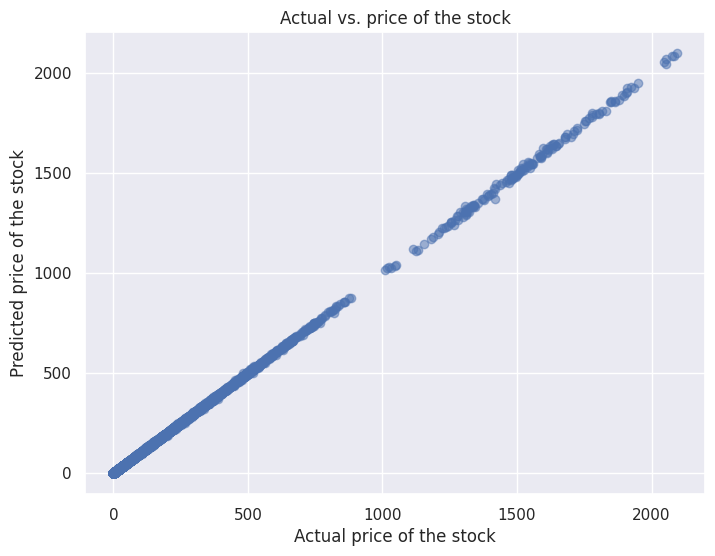

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Laso Regression

In [87]:
from sklearn.linear_model import Lasso

In [88]:
lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.739e+05, tolerance: 3.113e+05
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [89]:
y_pred = lasso_regressor.predict(X_test)

In [90]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 3.5659134507505845
Root Mean Squared Error: 1.8883626375118165


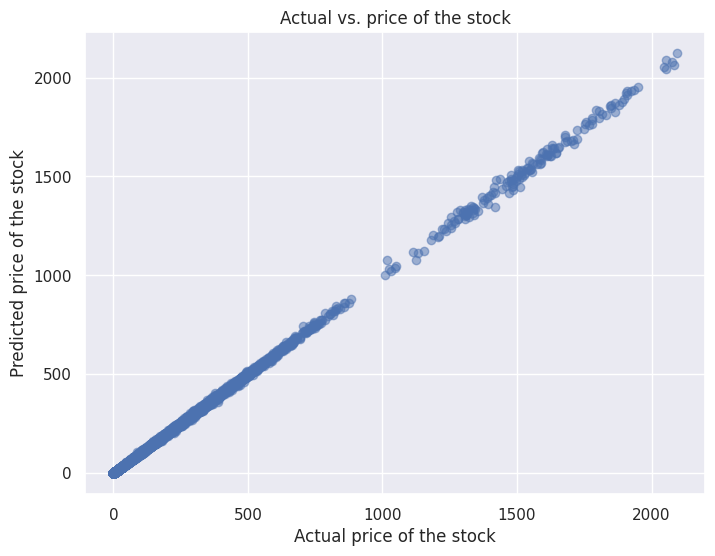

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Polynomial Regression

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [94]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [95]:
y_pred = model.predict(X_test_poly)

In [96]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 6372.275415893371
Root Mean Squared Error: 79.82653328244545


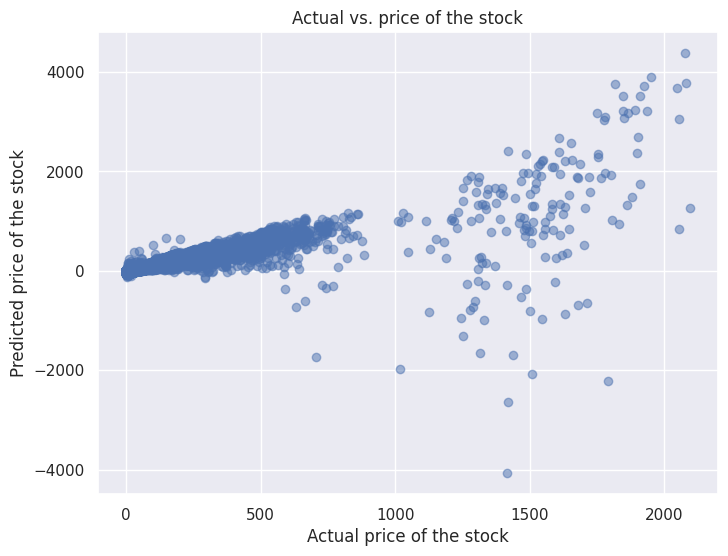

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()


# Prediction Using Bayesian Ridge Regression

In [98]:
from sklearn.linear_model import BayesianRidge

In [99]:
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

BayesianRidge()

In [100]:
y_pred = bayesian_regressor.predict(X_test)

In [101]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.9126482080044725
Root Mean Squared Error: 0.9553262311925035


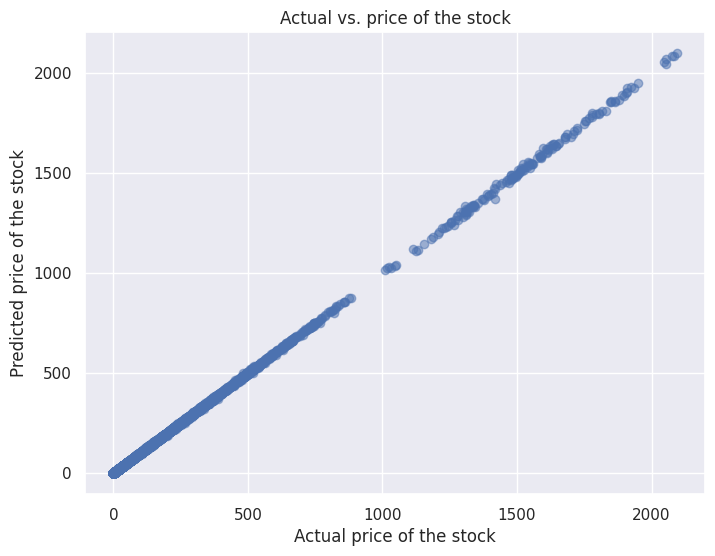

In [102]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Logistic Regression

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
# Calculating the daily price change as (Close - Open)
X_train['PriceChange'] = df['Close'] - df['Open']
X_test['PriceChange'] = df['Close'] - df['Open']

# Binary labels: 1 if price increased, 0 otherwise
y_train = (X_train['PriceChange'] > 0).astype(int)
y_test = (X_test['PriceChange'] > 0).astype(int)

# Droping PriceChange
X_train.drop('PriceChange', axis=1, inplace=True)
X_test.drop('PriceChange', axis=1, inplace=True)

In [105]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [106]:
y_pred = logistic_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.4965594895533592
MSE: 0.4965594895533592
RMSE: 0.7046697734069195


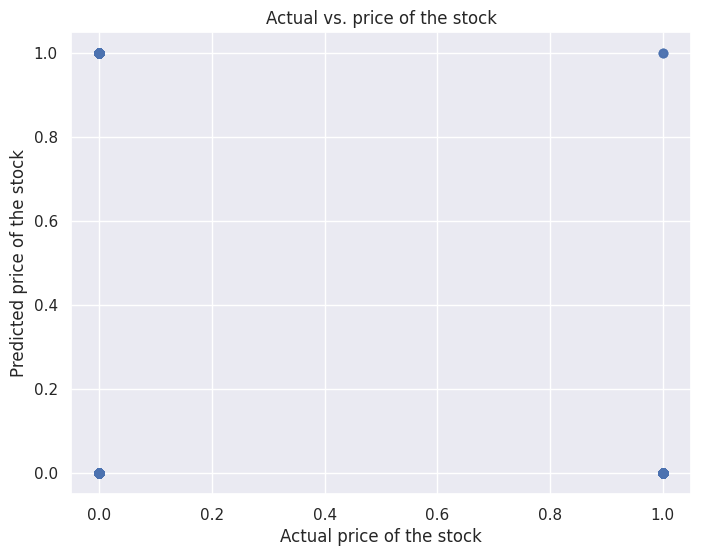

In [107]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()